# Resultados y experimentos

En este notebook mostraremos algunos resultados estadísticos de la simulación

In [7]:
from simulation_engine import *

# simulation_time:int = 14 * 60 # 14 hours * 60 min = 840
simulation_time:int = 600
product_price = 10
# The simulation time is in minutes
sim = InventorySimulation(sim_duration=simulation_time, s=20, S= 300, initial_inventory_level= 0, product_value=product_price)
sim.run()

In [8]:
from sim_stats import FlattenRegistry, SimStatistics
from graphics import Graphics

sim_statistics = SimStatistics(sim.registry)
graph = Graphics(sim_statistics)

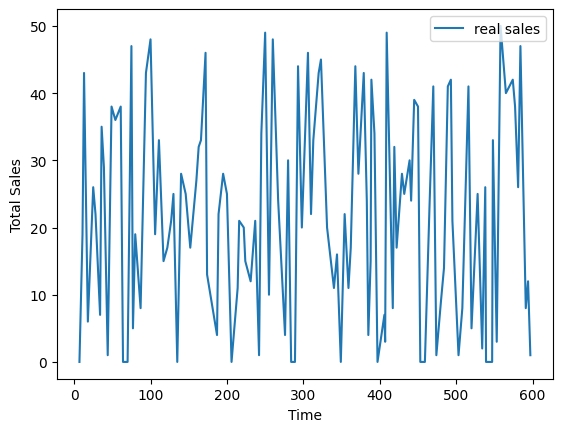

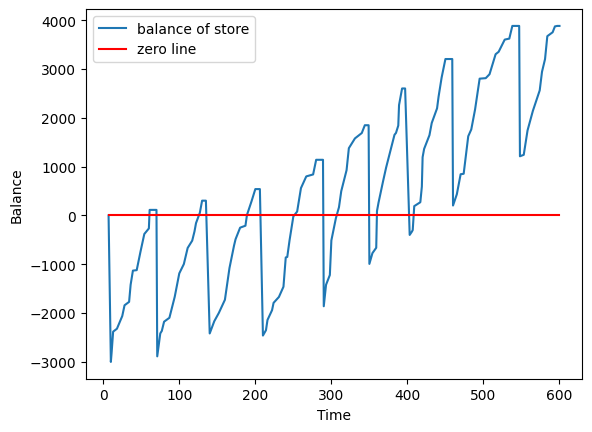

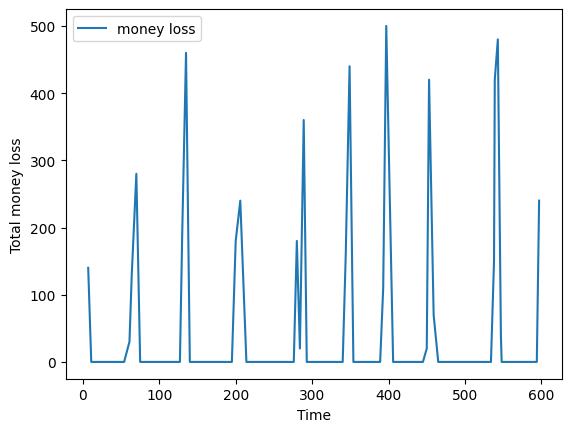

In [9]:
graph.plot_sells()
graph.plot_balance()
graph.plot_loss(product_price=product_price)

## Optimización de la simulación

Asdds

In [10]:
from optimizer import OptimizeSimulation

opt = OptimizeSimulation(sim, 30)
res = opt.optimize(steps_search=20, single_point=True)
print(res)

(300, 300)


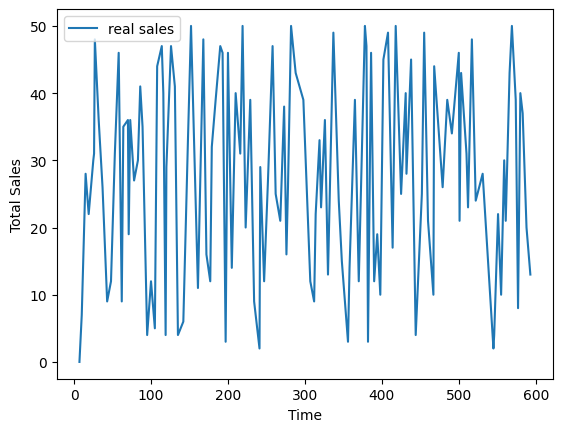

In [11]:
from sim_stats import FlattenRegistry, SimStatistics
from graphics import Graphics

sim_statistics = SimStatistics(sim.registry)
graph = Graphics(sim_statistics)

graph.plot_sells()

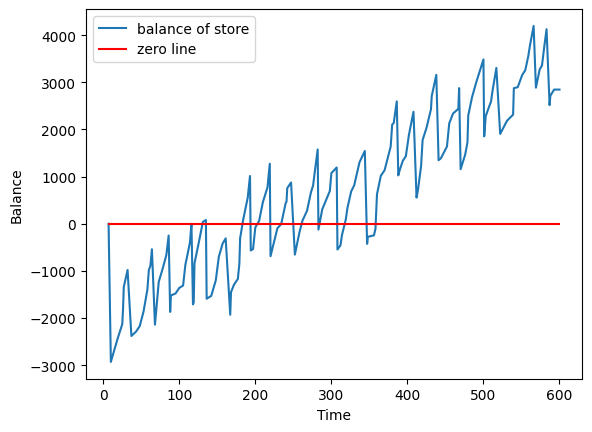

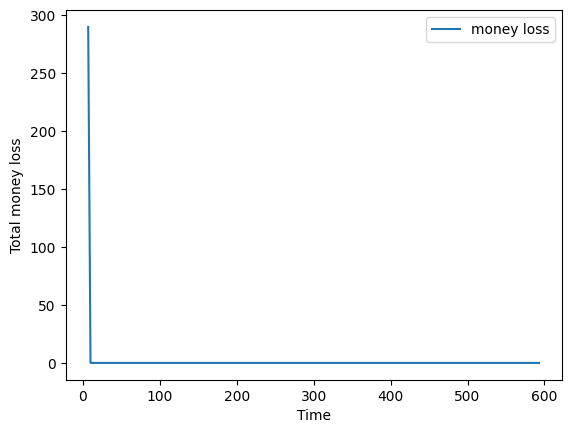

In [12]:
graph.plot_balance()
graph.plot_loss(product_price)